In [1]:
!pip3 install -U ucimlrepo 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
support2 = fetch_ucirepo(id=880) 
  
# data (as pandas dataframes) 
X = support2.data.features 
y = support2.data.targets 
  
# metadata 
print(support2.metadata) 
  
# variable information 
print(support2.variables) 

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

### Pre-Processing

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
X

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.000000
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.000000
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,0.000000
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,0.000000
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,0.0,52870.0,34329.3125,...,0.399963,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000
9101,55.15399,female,Coma,Coma,1,11.0,NaN,41.0,35377.0,23558.5000,...,NaN,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,46564.0,31409.0156,...,0.399963,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391
9103,47.01999,male,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,0.0,58439.0,NaN,...,0.399963,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000


In [5]:
y

,death,hospdead,sfdm2
0,0,0,NaN
1,1,1,<2 mo. follow-up
2,1,0,<2 mo. follow-up
3,1,0,no(M2 and SIP pres)
4,0,0,no(M2 and SIP pres)
...,...,...,...
9100,0,0,NaN
9101,0,0,NaN
9102,0,0,NaN
9103,1,1,<2 mo. follow-up


In [6]:
data = X.copy(deep=True)
y = data['diabetes']

In [7]:
data.isnull().sum()

age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
dtype: int64

In [8]:
y.isnull().sum()

0

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,15.593710,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.856990,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,73.998960,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [11]:
percentage_diabetes_0 = (data['diabetes'].value_counts()[0] / len(data)) * 100
percentage_diabetes_1 = (data['diabetes'].value_counts()[1] / len(data)) * 100

# Display the percentages
print("Percentage of Patients Without Diabetes :", percentage_diabetes_0, "%")
print("Percentage of Patients With Diabetes :", percentage_diabetes_1, "%")

Percentage of Patients Without Diabetes : 80.47226798462384 %
Percentage of Patients With Diabetes : 19.527732015376166 %


In [12]:
positive = data[data['diabetes'] == 1]
negative = data[data['diabetes'] == 0]

target_negative = int(len(positive) / 0.4 * 0.6)

negative_sample = negative.sample(target_negative).reset_index(drop=True)
balanced_data = pd.concat([positive, negative_sample]).reset_index(drop=True)
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

print("Balanced Data Class Distribution:")
print(balanced_data['diabetes'].value_counts())

Balanced Data Class Distribution:
0    2667
1    1778
Name: diabetes, dtype: int64


In [13]:
percentage_positive = (balanced_data['diabetes'].value_counts()[1] / len(balanced_data)) * 100
percentage_negative = (balanced_data['diabetes'].value_counts()[0] / len(balanced_data)) * 100

print(f"Percentage of Patients With Diabetes : {percentage_positive:.2f}%")
print(f"Percentage of Patients Without Diabetes : {percentage_negative:.2f}%")

Percentage of Patients With Diabetes : 40.00%
Percentage of Patients Without Diabetes : 60.00%


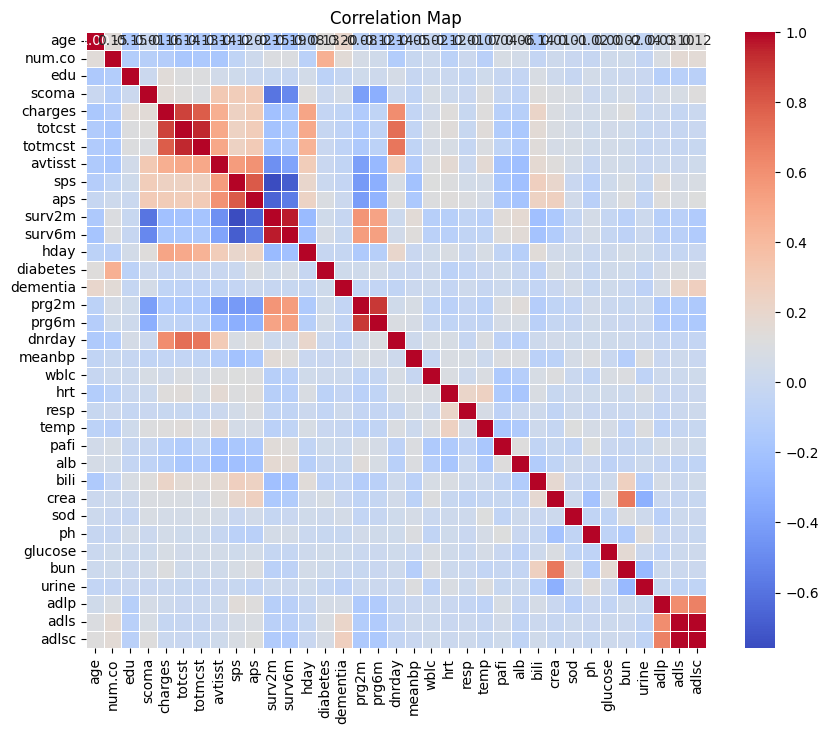

In [14]:
correlation_matrix = balanced_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

In [15]:
balanced_data = balanced_data.dropna()

In [16]:
balanced_data = pd.get_dummies(balanced_data, columns=['income'], prefix='income')

In [17]:
balanced_data = pd.get_dummies(balanced_data, columns=['sex'], prefix='sex')

In [18]:
balanced_data = pd.get_dummies(balanced_data, columns=['dzgroup'], prefix='dzgroup')

In [19]:
balanced_data = pd.get_dummies(balanced_data, columns=['dzclass'], prefix='dzclass')

In [20]:
balanced_data = pd.get_dummies(balanced_data, columns=['ca'], prefix='ca')

In [21]:
balanced_data = pd.get_dummies(balanced_data, columns=['race'], prefix='race')

In [22]:
balanced_data = balanced_data.drop(columns=['prg2m', 'prg6m', 'dnr', 'sfdm2'], errors='ignore')

### Data Preprocessing

In [23]:
X = balanced_data.drop('diabetes',axis=1)
y = balanced_data['diabetes']

In [24]:
scaler=StandardScaler()
x_std=scaler.fit_transform(X)
x_std

array([[ 0.46912292,  0.32998327, -0.97217058, ..., -0.42874646,
        -0.15961738,  0.47854742],
       [ 0.4647786 , -0.92007099, -0.97217058, ..., -0.42874646,
        -0.15961738,  0.47854742],
       [-2.12643115, -0.29504386, -0.0656872 , ..., -0.42874646,
        -0.15961738,  0.47854742],
       ...,
       [-1.83338395, -1.54509812,  0.84079618, ..., -0.42874646,
        -0.15961738,  0.47854742],
       [-0.26083737, -0.29504386,  0.23647392, ..., -0.42874646,
        -0.15961738, -2.08965707],
       [ 0.55105663, -0.92007099, -0.67000945, ..., -0.42874646,
        -0.15961738,  0.47854742]])

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.25)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (120, 57)
x_test: (41, 57)
y_train: (120,)
y_test: (41,)


## SVM

### Model Generation SVM - Linear

In [26]:
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

### Model Evaluation

In [27]:
prediction=classifier.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 78.04878048780488


In [28]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.7647058823529411
Recall: 0.7222222222222222
F1-Score: 0.7428571428571428


### Model Generation SVM - Poly

In [29]:
classifier_pol=svm.SVC(kernel='poly')
classifier_pol.fit(x_train,y_train)

SVC(kernel='poly')

### Model Evaluation -Poly

In [30]:
prediction=classifier_pol.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 58.536585365853654


In [31]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 1.0
Recall: 0.05555555555555555
F1-Score: 0.10526315789473684


### Model Generation SVM - Radial Basis Funct

In [32]:
classifier_rbf=svm.SVC(kernel='rbf')
classifier_rbf.fit(x_train,y_train)

SVC()

### Model Evaluation - Radial Basis Funct

In [33]:
prediction=classifier_rbf.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 73.17073170731707


In [34]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8181818181818182
Recall: 0.5
F1-Score: 0.6206896551724137


## Naive Bayes

In [35]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [36]:
prediction_NB = model.predict(x_test)

In [37]:
testing_data_accuracy =accuracy_score(prediction_NB,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 39.02439024390244


In [38]:
precision = precision_score(y_test, prediction_NB)
recall = recall_score(y_test, prediction_NB)
f1 = f1_score(y_test, prediction_NB)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.40540540540540543
Recall: 0.8333333333333334
F1-Score: 0.5454545454545455


### PCA

In [39]:
pca = PCA()
pca.fit(balanced_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [40]:
d = np.argmax(cumsum >= 0.95) + 1
d

1

In [41]:
pca = PCA(n_components=d)
pca.fit(balanced_data)

PCA(n_components=1)

In [42]:
# Get the indices of the top features for each component
top_feature_indices = [component.argsort()[-1::-1][:1] for component in pca.components_]

# Get the feature names for the top features of each component
feature_names = list(balanced_data.columns[:-1])  
top_features_names = []

for indices in top_feature_indices:
    top_feature_names = [feature_names[i] for i in indices]
    top_features_names.append(top_feature_names)

In [43]:
top_features_names

[['charges']]

In [48]:
numerical_columns = balanced_data.select_dtypes(include=[np.number]).columns
numerical_data = balanced_data[numerical_columns]

#### Standardize

In [49]:
scaler = StandardScaler()
numerical_data_std = scaler.fit_transform(numerical_data)

In [50]:
pca = PCA()
pca.fit(numerical_data_std)

PCA()

In [51]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

33

In [52]:
pca = PCA(n_components=d)
pca.fit(numerical_data_std)

PCA(n_components=33)

In [53]:
top_feature_indices = [component.argsort()[-1::-1][:1] for component in pca.components_]

# Get the feature names for the top features of each component
feature_names = list(numerical_data.columns)  
top_features_names = []

for indices in top_feature_indices:
    top_feature_names = [feature_names[i] for i in indices]
    top_features_names.append(top_feature_names)

top_features_names

[['dzclass_ARF/MOSF'],
 ['ca_metastatic'],
 ['adlsc'],
 ['sex_male'],
 ['dzclass_Coma'],
 ['crea'],
 ['charges'],
 ['dzgroup_Coma'],
 ['ca_no'],
 ['diabetes'],
 ['race_asian'],
 ['dzgroup_COPD'],
 ['income_$11-$25k'],
 ['dzgroup_Cirrhosis'],
 ['sod'],
 ['hrt'],
 ['glucose'],
 ['income_$25-$50k'],
 ['dzgroup_Cirrhosis'],
 ['urine'],
 ['pafi'],
 ['pafi'],
 ['dzgroup_Colon Cancer'],
 ['sod'],
 ['ph'],
 ['race_hispanic'],
 ['ph'],
 ['urine'],
 ['avtisst'],
 ['pafi'],
 ['hday'],
 ['meanbp'],
 ['avtisst']]

### SVM

In [54]:
x_pca = pca.transform(balanced_data)

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, balanced_data['diabetes'], test_size=0.2)

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [59]:
testing_data_accuracy =accuracy_score(y_pred,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 63.63636363636363


In [60]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.5
Recall: 0.5833333333333334
F1-Score: 0.5384615384615384


### Naive Bayes

In [61]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [62]:
testing_data_accuracy =accuracy_score(y_pred,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 45.45454545454545


In [63]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.39285714285714285
Recall: 0.9166666666666666
F1-Score: 0.55
